In [ ]:
import tensorflow as tf
import tensorflow.keras.datasets.cifar10 as cifar
import numpy as np
import pandas as pd
import keras
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import os
import cv2
import sys
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import optimizers

In [ ]:
data = cifar.load_data()
(X_train, y_train), (X_test, y_test) = data
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape
num_class = len(set(y_train))
print("Number Of Classes: ", num_class)

Number Of Classes:  10


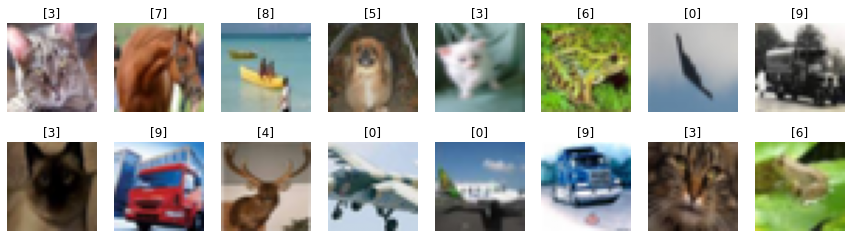

In [ ]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_train[random_index, :])
        ax.set_title([y_train[random_index]])
plt.show()

first model 

In [ ]:
model = Sequential([Input(shape = X_train[0].shape) ,Conv2D(16,(3,3), activation='relu',  padding="same" , input_shape=(32,32,1)),
                    Conv2D(32,(3,3), padding="same" , activation='relu'),                   
                    Conv2D(32,(3,3), padding="same" , activation='relu'),

                    Conv2D(128,(3,3), padding="same" , activation='relu'),

                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')])

In [ ]:
model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 128)       36992     
                                                                 
 flatten_2 (Flatten)         (None, 131072)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               16777344  
                                                                 
 dense_4 (Dense)             (None, 10)               

In [ ]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25 , batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4212 - accuracy: 0.4886 - val_loss: 1.1355 - val_accuracy: 0.5935
Epoch 2/25
1563/1563 [==============================] - 40s 26ms/step - loss: 0.9282 - accuracy: 0.6710 - val_loss: 0.9568 - val_accuracy: 0.6712
Epoch 3/25
1563/1563 [==============================] - 40s 25ms/step - loss: 0.6559 - accuracy: 0.7711 - val_loss: 0.9347 - val_accuracy: 0.6846
Epoch 4/25
1563/1563 [==============================] - 40s 25ms/step - loss: 0.3635 - accuracy: 0.8743 - val_loss: 1.1491 - val_accuracy: 0.6713
Epoch 5/25
1563/1563 [==============================] - 40s 26ms/step - loss: 0.1675 - accuracy: 0.9419 - val_loss: 1.6565 - val_accuracy: 0.6464
Epoch 6/25
1563/1563 [==============================] - 40s 25ms/step - loss: 0.1041 - accuracy: 0.9639 - val_loss: 1.8793 - val_accuracy: 0.6604
Epoch 7/25
1563/1563 [==============================] - 40s 26ms/step - loss: 0.0842 - accuracy: 0.9708 - val_loss: 2.2155 -

second model


In [ ]:
model2 = Sequential([Input(shape = X_train[0].shape) ,Conv2D(16,(3,3), activation='relu',  padding="same" , input_shape=(32,32,1)),
                    Conv2D(32,(3,3), padding="same" , activation='relu'),

                    Conv2D(32,(3,3), padding="same" , activation='relu'),
                    Conv2D(64,(3,3), padding="same" , activation='relu'),

                    Conv2D(64,(3,3),  padding="same" ,activation='relu'),
                    Conv2D(128,(3,3), padding="same" , activation='relu'),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')])

In [ ]:
model2.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 conv2d_32 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 flatten_5 (Flatten)         (None, 131072)           

In [ ]:
r = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15 , batch_size=32)

Epoch 1/15
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4700 - accuracy: 0.4662 - val_loss: 1.1496 - val_accuracy: 0.5885
Epoch 2/15
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0190 - accuracy: 0.6380 - val_loss: 1.0663 - val_accuracy: 0.6289
Epoch 3/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7645 - accuracy: 0.7293 - val_loss: 0.9414 - val_accuracy: 0.6801
Epoch 4/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.4992 - accuracy: 0.8236 - val_loss: 1.0574 - val_accuracy: 0.6700
Epoch 5/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.2749 - accuracy: 0.9041 - val_loss: 1.4605 - val_accuracy: 0.6547
Epoch 6/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.1605 - accuracy: 0.9442 - val_loss: 1.9068 - val_accuracy: 0.6463
Epoch 7/15
1563/1563 [==============================] - 57s 37ms/step - loss: 0.1192 - accuracy: 0.9596 - val_loss: 1.9475 -

In [ ]:
history = r.history
acc_val = history['val_accuracy']
acc_tra = history['accuracy']

In [ ]:
acc_val[-1]

0.6463000178337097

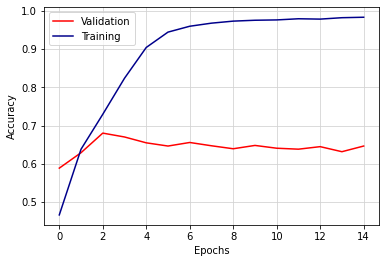

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val, 'red')
plt.plot(acc_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

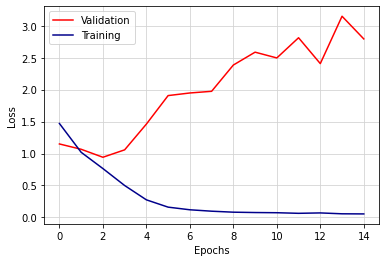

In [ ]:
loss_val = history['val_loss']
loss_tra = history['loss']
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(loss_val, 'red')
plt.plot(loss_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

fixing overfit

In [ ]:
modele = Sequential([Input(shape = X_train[0].shape) ,Conv2D(16,(3,3), activation='relu',  padding="same" , input_shape=(32,32,1)),
                    Conv2D(32,(3,3), padding="same" , activation='relu'),

                    Conv2D(32,(3,3), padding="same" , activation='relu'),
                    Conv2D(64,(3,3), padding="same" , activation='relu'),

                    Conv2D(64,(3,3),  padding="same" ,activation='relu'),
                    Conv2D(128,(3,3), padding="same" , activation='relu'),
                    Flatten(),
                    Dense(32, activation='relu'),
                    Dense(10, activation='softmax')])

In [ ]:
modele.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
modele.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_35 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 conv2d_38 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 conv2d_39 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 flatten_6 (Flatten)         (None, 131072)           

In [ ]:
r_3 = modele.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15 , batch_size= 128)

Epoch 1/15
196/196 [==============================] - 48s 155ms/step - loss: 1.9495 - accuracy: 0.2754 - val_loss: 1.6554 - val_accuracy: 0.3988
Epoch 2/15
196/196 [==============================] - 30s 152ms/step - loss: 1.4455 - accuracy: 0.4727 - val_loss: 1.3216 - val_accuracy: 0.5235
Epoch 3/15
196/196 [==============================] - 30s 152ms/step - loss: 1.1959 - accuracy: 0.5704 - val_loss: 1.1610 - val_accuracy: 0.5811
Epoch 4/15
196/196 [==============================] - 31s 156ms/step - loss: 1.0077 - accuracy: 0.6413 - val_loss: 1.1094 - val_accuracy: 0.6076
Epoch 5/15
196/196 [==============================] - 30s 153ms/step - loss: 0.8815 - accuracy: 0.6865 - val_loss: 0.9655 - val_accuracy: 0.6556
Epoch 6/15
196/196 [==============================] - 31s 156ms/step - loss: 0.7471 - accuracy: 0.7323 - val_loss: 0.9918 - val_accuracy: 0.6595
Epoch 7/15
196/196 [==============================] - 30s 153ms/step - loss: 0.6390 - accuracy: 0.7707 - val_loss: 0.9642 - val_ac

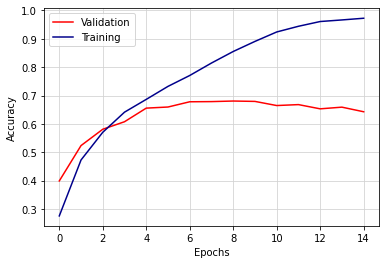

In [ ]:
history = r_3.history
acc_val = history['val_accuracy']
acc_tra = history['accuracy']
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val, 'red')
plt.plot(acc_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

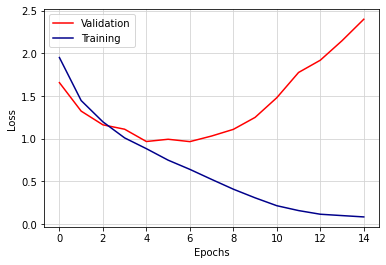

In [ ]:
loss_val = history['val_loss']
loss_tra = history['loss']
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(loss_val, 'red')
plt.plot(loss_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

part 2  : adding batch normalization and pooling

In [ ]:
model4 = Sequential([Input(shape = X_train[0].shape) ,Conv2D(16,(3,3), activation='relu',  padding="same" , input_shape=(32,32,1)),
                    Conv2D(32,(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),

                    Conv2D(32,(3,3), padding="same" , activation='relu'),
                    Conv2D(64,(3,3), padding="same" , activation='relu'),
                    BatchNormalization(),

                    Conv2D(64,(3,3),  padding="same" ,activation='relu'),
                    Conv2D(128,(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(32, activation='relu'),
                    Dense(10, activation='softmax')])

In [ ]:
model4.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_41 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_42 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 conv2d_43 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 64)       256       
 ormalization)                                        

In [ ]:
r_2 = model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15 , batch_size= 256)

Epoch 1/15
196/196 [==============================] - 12s 60ms/step - loss: 1.4324 - accuracy: 0.4808 - val_loss: 1.9943 - val_accuracy: 0.5445
Epoch 2/15
196/196 [==============================] - 11s 58ms/step - loss: 0.9340 - accuracy: 0.6724 - val_loss: 1.3558 - val_accuracy: 0.6503
Epoch 3/15
196/196 [==============================] - 11s 57ms/step - loss: 0.7490 - accuracy: 0.7389 - val_loss: 0.9291 - val_accuracy: 0.6940
Epoch 4/15
196/196 [==============================] - 11s 57ms/step - loss: 0.6146 - accuracy: 0.7864 - val_loss: 0.8990 - val_accuracy: 0.6800
Epoch 5/15
196/196 [==============================] - 11s 57ms/step - loss: 0.5212 - accuracy: 0.8172 - val_loss: 0.9766 - val_accuracy: 0.6872
Epoch 6/15
196/196 [==============================] - 11s 57ms/step - loss: 0.4422 - accuracy: 0.8455 - val_loss: 0.8435 - val_accuracy: 0.7306
Epoch 7/15
196/196 [==============================] - 11s 57ms/step - loss: 0.3742 - accuracy: 0.8688 - val_loss: 0.8209 - val_accuracy:

In [ ]:
history = r_2.history
acc_val = history['val_accuracy']
acc_tra = history['accuracy']

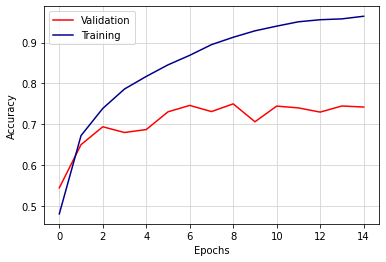

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val, 'red')
plt.plot(acc_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

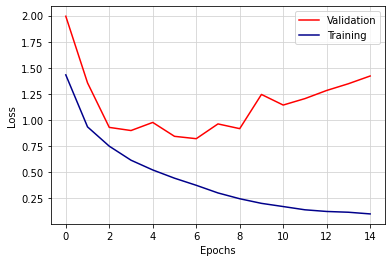

In [ ]:
loss_val = history['val_loss']
loss_tra = history['loss']
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(loss_val, 'red')
plt.plot(loss_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

In [ ]:
score, acc = model4.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

313/313 [==============================] - 2s 7ms/step - loss: 1.4217 - accuracy: 0.7423
Test score: 1.4216575622558594
Test accuracy: 0.7422999739646912


part 3 / adding dropout

dropout(0.25)

In [ ]:
model5 = Sequential([Input(shape = X_train[0].shape) ,Conv2D(16,(3,3), activation='relu',  padding="same" , input_shape=(32,32,1)),
                    Conv2D(32,(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Dropout(0.25),

                    Conv2D(32,(3,3), padding="same" , activation='relu'),
                    Conv2D(64,(3,3), padding="same" , activation='relu'),
                    BatchNormalization(),
                    Dropout(0.25) ,

                    Conv2D(64,(3,3),  padding="same" ,activation='relu'),
                    Conv2D(128,(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Dropout(0.25),
                    Flatten(),
                    Dense(32, activation='relu'),
                    Dense(10, activation='softmax')])

In [ ]:
model5.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_47 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_48 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 conv2d_49 (Conv2D)          (None, 16, 16, 64)        18496     
                                                      

In [ ]:
r_5 = model5.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15 , batch_size= 256)

Epoch 1/15
196/196 [==============================] - 13s 64ms/step - loss: 2.0389 - accuracy: 0.2117 - val_loss: 2.1261 - val_accuracy: 0.2311
Epoch 2/15
196/196 [==============================] - 12s 61ms/step - loss: 1.5119 - accuracy: 0.4161 - val_loss: 1.7601 - val_accuracy: 0.4195
Epoch 3/15
196/196 [==============================] - 12s 62ms/step - loss: 1.1266 - accuracy: 0.5869 - val_loss: 1.1351 - val_accuracy: 0.6095
Epoch 4/15
196/196 [==============================] - 13s 65ms/step - loss: 0.9824 - accuracy: 0.6424 - val_loss: 0.9536 - val_accuracy: 0.6624
Epoch 5/15
196/196 [==============================] - 12s 62ms/step - loss: 0.8929 - accuracy: 0.6794 - val_loss: 0.9267 - val_accuracy: 0.6800
Epoch 6/15
196/196 [==============================] - 12s 63ms/step - loss: 0.8347 - accuracy: 0.7004 - val_loss: 0.8254 - val_accuracy: 0.7108
Epoch 7/15
196/196 [==============================] - 12s 62ms/step - loss: 0.7895 - accuracy: 0.7174 - val_loss: 0.7910 - val_accuracy:

In [ ]:
history = r_5.history
acc_val = history['val_accuracy']
acc_tra = history['accuracy']

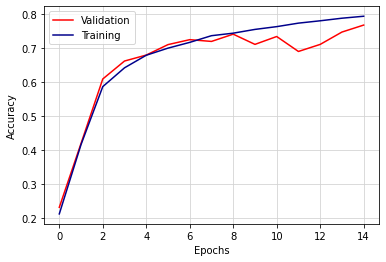

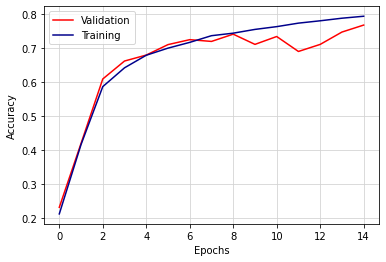

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val, 'red')
plt.plot(acc_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

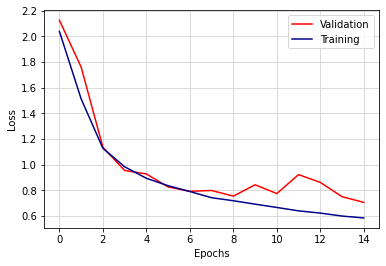

In [ ]:
loss_val = history['val_loss']
loss_tra = history['loss']
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(loss_val, 'red')
plt.plot(loss_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

In [ ]:
score, acc = model5.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.7049 - accuracy: 0.7684
Test score: 0.7048894762992859
Test accuracy: 0.7684000134468079


dropout(0.5)

In [ ]:
model6 = Sequential([Input(shape = X_train[0].shape) ,Conv2D(16,(3,3), activation='relu',  padding="same" , input_shape=(32,32,1)),
                    Conv2D(32,(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Dropout(0.5),

                    Conv2D(32,(3,3), padding="same" , activation='relu'),
                    Conv2D(64,(3,3), padding="same" , activation='relu'),
                    BatchNormalization(),
                    Dropout(0.5) ,

                    Conv2D(64,(3,3),  padding="same" ,activation='relu'),
                    Conv2D(128,(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Dropout(0.5),
                    Flatten(),
                    Dense(32, activation='relu'),
                    Dense(10, activation='softmax')])

In [ ]:
model6.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model6.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_53 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_54 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 conv2d_55 (Conv2D)          (None, 16, 16, 64)        18496     
                                                      

In [ ]:
r_5 = model6.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15 , batch_size= 256)

Epoch 1/15
196/196 [==============================] - 13s 64ms/step - loss: 2.1158 - accuracy: 0.1971 - val_loss: 2.2280 - val_accuracy: 0.1540
Epoch 2/15
196/196 [==============================] - 12s 62ms/step - loss: 1.6304 - accuracy: 0.3795 - val_loss: 1.7701 - val_accuracy: 0.4502
Epoch 3/15
196/196 [==============================] - 12s 61ms/step - loss: 1.3813 - accuracy: 0.4934 - val_loss: 1.2588 - val_accuracy: 0.5652
Epoch 4/15
196/196 [==============================] - 12s 62ms/step - loss: 1.2055 - accuracy: 0.5681 - val_loss: 1.2703 - val_accuracy: 0.5589
Epoch 5/15
196/196 [==============================] - 12s 62ms/step - loss: 1.0933 - accuracy: 0.6102 - val_loss: 1.0560 - val_accuracy: 0.6341
Epoch 6/15
196/196 [==============================] - 12s 62ms/step - loss: 1.0119 - accuracy: 0.6436 - val_loss: 0.9284 - val_accuracy: 0.6759
Epoch 7/15
196/196 [==============================] - 12s 62ms/step - loss: 0.9445 - accuracy: 0.6655 - val_loss: 0.9483 - val_accuracy:

In [ ]:
history = r_5.history
acc_val = history['val_accuracy']
acc_tra = history['accuracy']

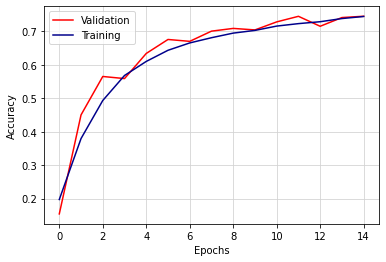

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val, 'red')
plt.plot(acc_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

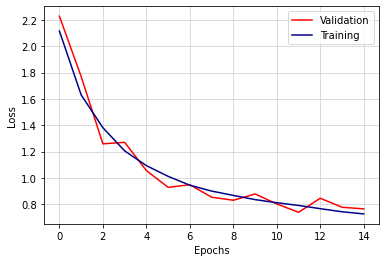

In [ ]:
loss_val = history['val_loss']
loss_tra = history['loss']
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(loss_val, 'red')
plt.plot(loss_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

In [ ]:
score, acc = model6.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.7649 - accuracy: 0.7454
Test score: 0.764855682849884
Test accuracy: 0.7454000115394592


early stopping

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='max')
model7 = Sequential([Input(shape = X_train[0].shape) ,Conv2D(16,(3,3), activation='relu',  padding="same" , input_shape=(32,32,1)),
                    Conv2D(32,(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Dropout(0.5),

                    Conv2D(32,(3,3), padding="same" , activation='relu'),
                    Conv2D(64,(3,3), padding="same" , activation='relu'),
                    BatchNormalization(),
                    Dropout(0.5) ,

                    Conv2D(64,(3,3),  padding="same" ,activation='relu'),
                    Conv2D(128,(3,3), padding="same" , activation='relu'),
                    MaxPooling2D(2,2),
                    Dropout(0.5),
                    Flatten(),
                    Dense(32, activation='relu'),
                    Dense(10, activation='softmax')])

In [ ]:
model7.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model7.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_44 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 conv2d_45 (Conv2D)          (None, 16, 16, 64)        18496     
                                                      

In [ ]:
r_6 = model7.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25 , batch_size= 256,callbacks = [callback])

Epoch 1/25
196/196 [==============================] - 37s 64ms/step - loss: 2.2846 - accuracy: 0.1232 - val_loss: 2.2902 - val_accuracy: 0.1349
Epoch 2/25
196/196 [==============================] - 12s 62ms/step - loss: 2.1312 - accuracy: 0.1905 - val_loss: 2.2731 - val_accuracy: 0.1202
Epoch 3/25
196/196 [==============================] - 12s 62ms/step - loss: 2.0274 - accuracy: 0.2065 - val_loss: 1.9999 - val_accuracy: 0.2172
Epoch 4/25
196/196 [==============================] - 12s 62ms/step - loss: 1.9520 - accuracy: 0.2253 - val_loss: 1.8081 - val_accuracy: 0.3192
Epoch 5/25
196/196 [==============================] - 12s 62ms/step - loss: 1.6733 - accuracy: 0.3443 - val_loss: 1.5080 - val_accuracy: 0.4001
Epoch 6/25
196/196 [==============================] - 12s 62ms/step - loss: 1.4652 - accuracy: 0.4304 - val_loss: 1.4568 - val_accuracy: 0.4608
Epoch 7/25
196/196 [==============================] - 12s 62ms/step - loss: 1.3186 - accuracy: 0.5080 - val_loss: 1.2813 - val_accuracy:

In [ ]:
history = r_6.history
acc_val = history['val_accuracy']
acc_tra = history['accuracy']

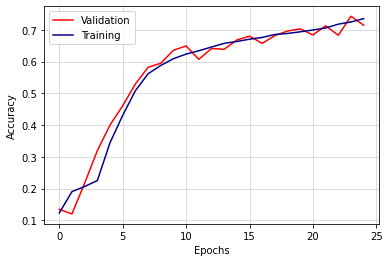

In [ ]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val, 'red')
plt.plot(acc_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

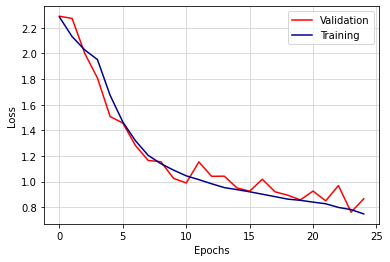

In [ ]:
loss_val = history['val_loss']
loss_tra = history['loss']
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(loss_val, 'red')
plt.plot(loss_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()